For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

null- switching internet did not affect the latency

alternative- switching did affect the internet

True Pos- the latency was affected by the switch, and it test proves it

True Neg- the latency was no affected by the switch and the test proves it

false pos- the test shows there is change and in contrary to the conlcusion

false neg- the test shows the is no change, in contrary to the conclusion

Is the website redesign any good?

null- the redesign did not affect the amount of clicks in the website

alternative- the redesign did affect the amount of clicks in the website

True Pos- the amount of clicks did change, and it test proves it

True Neg- the amount of clicks not did change and the test proves it

false pos- the test shows there is change and in contrary to the conlcusion

false neg- the test shows the is no change, in contrary to the conclusion

Is our television ad driving more sales?


null - the net profit since the first ad has not changed

alternative- the net profit since the first ad has changed

True Pos - the companies profit did and the test proves it

True Neg - the companies profit has not changeg and the test proves it

false pos - the test shows there is change and in contrary to the conlcusion

false neg - the test shows the is no change, in contrary to the conclusion

In [7]:
import pandas as pd
import numpy as np

from pydataset import data

from scipy import stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

In [118]:
data = {
    'Uses a Macbook': [49, 20],
    'Doesn\'t Use A Macbook': [1, 30]
}

# Index
index = ['Codeup Student', 'Not Codeup Student']
df = pd.DataFrame(data, index=index)
df


,Uses a Macbook,Doesn't Use A Macbook
Codeup Student,49,1
Not Codeup Student,20,30


Ho = there is no connection between macbook and being a codeup student
Ha = there is a connection between macbook and being a codeup student

In [119]:
alpha = .05
stats.chi2_contingency(df)


Chi2ContingencyResult(statistic=36.65264142122487, pvalue=1.4116760526193828e-09, dof=1, expected_freq=array([[34.5, 15.5],
       [34.5, 15.5]]))

In [120]:
chi2, p, dof, expected = stats.chi2_contingency(df)

In [121]:
#output values
print('Observed')
print(df.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49  1]
 [20 30]]

Expected
[[34 15]
 [34 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [122]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


Choose another 2 categorical variables from the mpg dataset.

    State your null and alternative hypotheses.
    
    State your alpha.
    
    Perform a chi2 test of independence.
    
    State your conclusion

In [123]:
df = (data('mpg'))
df.head()

TypeError: 'dict' object is not callable

In [ ]:
df['drv'].value_counts()

Ho - the drv type affects the class type
Ha - the drv type does not affect the class type

In [ ]:
observed = pd.crosstab(df['drv'], df['class'])
observed

In [ ]:
stats.chi2_contingency(observed)

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [ ]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('reject the null hypthersis')
else:
    print('fail to reject the null hypothesis')

Use the data from the employees database to answer these questions:

    Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees
    )
    Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
import env
import pymysql 
import sqlalchemy
url = env.get_db_url(env.user,env.password,env.host)

In [ ]:
df = pd.read_sql('select * from employees', url)

In [ ]:
df.head()

In [ ]:
tables = pd.read_sql('show tables', url)
tables

In [ ]:
current_emp = pd.read_sql('select * from employees join dept_emp using(emp_no) join departments using(dept_no) where to_date > now()', url)
current_emp.head()

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees

Ho - employees gender does not affect if they work in sales or marketing
Ha - employees gender does affect if they work in sales or marketing

In [ ]:
observed = pd.crosstab(current_emp.gender, current_emp.dept_name)
observed

In [ ]:
stats.chi2_contingency(observed)

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [ ]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
managers = pd.read_sql('select * from employees left join dept_manager using(emp_no)', url)
managers

Ho - the gender does not affect wether or not they are managers
Ha = the gender does affect wether or not they are managers

In [ ]:
managers['is_manager'] = managers.to_date.notnull()

In [ ]:
managers

In [ ]:
pd.crosstab(managers.is_manager, managers.gender)

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [ ]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

Answer with the type of stats test you would use (assume normal distribution):
Is there a relationship between the length of your arm and the length of your foot?

    correlation, pearsonr

Does smoking affect when or not someone has lung cancer?

    Chi-Square Test

Is gender independent of a person’s blood type?

    Chi-Square Test

Does whether or not a person has a cat or dog affect whether they live in an apartment?

    Chi-Square Test 

Does the length of time of the lecture correlate with a student's grade?

    Correlation

Use the telco_churn data.

    Does tenure correlate with monthly charges?
    
    Total charges?
    
    What happens if you control for phone and internet service?

In [ ]:
import env

In [ ]:
url = env.get_db_url()

In [ ]:
tables = pd.read_sql('show tables', url)
tables

In [ ]:
df = pd.read_sql('select * from customers', url)
df.head()

Ho- there is no correlation between tenure and monthly_charges
Ha- there is a correlation between tenure and monthly_charges

In [ ]:
stats.pearsonr(df.tenure, df.monthly_charges)

In [ ]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)

In [ ]:
plt.scatter(df.tenure, df.monthly_charges, alpha=.4)
plt.title('does monthly charges affect tenure')
plt.xlabel('tenure')
plt.ylabel('monthly charges')
plt.show()

In [ ]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

In [ ]:
df.head()

In [ ]:
df.total_charges.dropna().value_counts()

In [ ]:
test.total_charges.dropna().value_counts()

In [ ]:
df = pd.read_sql('select * from customers where total_charges != ""', url)
df.total_charges = pd.to_numeric(df.total_charges,errors='coerce')

In [ ]:
stats.pearsonr(df.tenure, df.total_charges)

In [ ]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

In [ ]:
plt.scatter(df.tenure, df.total_charges, alpha=.4)
plt.title('does total charges affect tenure')
plt.xlabel('tenure')
plt.ylabel('total charges')
plt.show()

In [ ]:
df['internet_service_type_id'].value_counts()

In [ ]:
sns.scatterplot(data=df, x='tenure', y='total_charges', hue='phone_service', alpha=.4)
plt.title('does total charges affect tenure')
plt.xlabel('tenure')
plt.ylabel('total charges')
plt.show()

Use the employees database.
    
    Is there a relationship between how long an employee has been with the company and their salary?
    
    Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
url =env.get_db_url()

In [165]:
df = pd.read_sql('select * from employees join salaries using(emp_no)', url)

In [166]:
df.dtypes

emp_no         int64
birth_date    object
first_name    object
last_name     object
gender        object
hire_date     object
salary         int64
from_date     object
to_date       object
dtype: object

In [167]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25


In [168]:
df.to_date.value_counts()

to_date
9999-01-01    240124
1998-10-25      1034
1997-10-26       872
2002-04-03       821
2000-08-26       815
               ...  
1985-08-29         1
1985-06-15         1
1986-01-14         1
1985-12-08         1
1985-11-17         1
Name: count, Length: 6120, dtype: int64

In [172]:
df['tenure_days'] = df.to_date = df.hire_date

In [173]:
df.tenure_days = df.tenure_days.astype('str').str.split(expand=True)[0]

In [174]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1986-06-26,1986-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1986-06-26,1986-06-26
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1986-06-26,1986-06-26
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1986-06-26,1986-06-26
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1986-06-26,1986-06-26


In [179]:
df.tenure_days = df.tenure_days.str.replace('-', '').astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

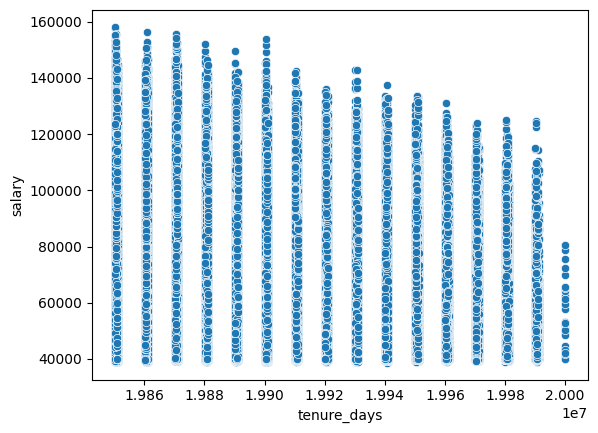

In [181]:
sns.scatterplot(data=df, x='tenure_days', y='salary')
plt.show

COMPARING MEANS

Answer with the type of test you would use (assume normal distribution):

    Is there a difference in grades of students on the second floor compared to grades of all students?

  1 sample  2 Tail T test      

    Are adults who drink milk taller than adults who don't drink milk?

2 sample 1 Tail T test

    Is the price of gas higher in Texas or in New Mexico?

2 sample 1 tail T test

    Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [14]:
ace1 = m1, std1, t = 90, 15, 40
ace2 = m2,std2, t2 = 100, 20, 50
alpha = .05

H0: There is no difference in the average time it takes to sell homes between the two office
H1: There is a difference in the average time it takes to sell homes between the two offices.

In [12]:
test, p = stats.ttest_ind_from_stats(m1, std1, t, m2, std2, t2)

In [15]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis
